In [302]:
from numpy import *
from numpy.linalg import *
from scipy.integrate import *
from scipy.signal import *

%matplotlib notebook
from matplotlib.pyplot import *
rcParams["figure.figsize"] = (10,6)

Chariot Model
==============

We consider a mobile robot of "chariot" type, evolving in the plane.
From above, its frame appears to be a disk of diameter $D$. It has two fixed wheels (their orientation does not change), which are parallel and located at opposite ends of the frame (hence separated by a distance of $D$) ;
these wheels have the common radius $R$.

The robot is symmetric with respect to the axis that joins the two wheels. For convenience, a green sticker is attached at the boundary of the frame on one side of this axis, on the robot axis of symmetry ; this side will is called the "front" of the robot, the point itself is called the "nose" of the robot. When we talk about the "left wheel" or the "right wheel", we assume that we are looking towards the front of the robot.

We will denote $(x, y)$ the coordinates of the wheel axis in the orthonormal frame $(0, e_x, e_y)$ of the plane. The angle $\theta$ refers to the angle of the wheels direction with respect to vector $e_x$ ; with
$\theta = 0$ when the front of the robot faces the right and $\theta = \pi/2$ when he faces the top.
We will denote $\phi_l$ and $\phi_r$ the rotation angles of the left and right wheel respectively ; by convention, when these angles increase, the robot moves forward.

### Task - Parameter Definition


From now on, we assume that the frame diameter is $D = 1 \mbox{ m}$ and the wheel radius is $R = 10 \mbox{ cm}$.
Define the corresponding Python variables `D` and `R` (express every length in meters, and more generally in the sequel, always use the [international standard of units](https://en.wikipedia.org/wiki/SI_derived_unit)) for numerical values. 

In [303]:
D = 1 #1m
R = 0.1 #10cm = 0.1m

### Task - Graphical Representation

Use `matplotlib` to draw an image of the robot in the plane for arbitrary values of $(x, y)$ and $\theta$. The frame will be represented as a circle, the wheels as lines and the nose as a green point.

### Solution Static of graphical representation

<IPython.core.display.Javascript object>


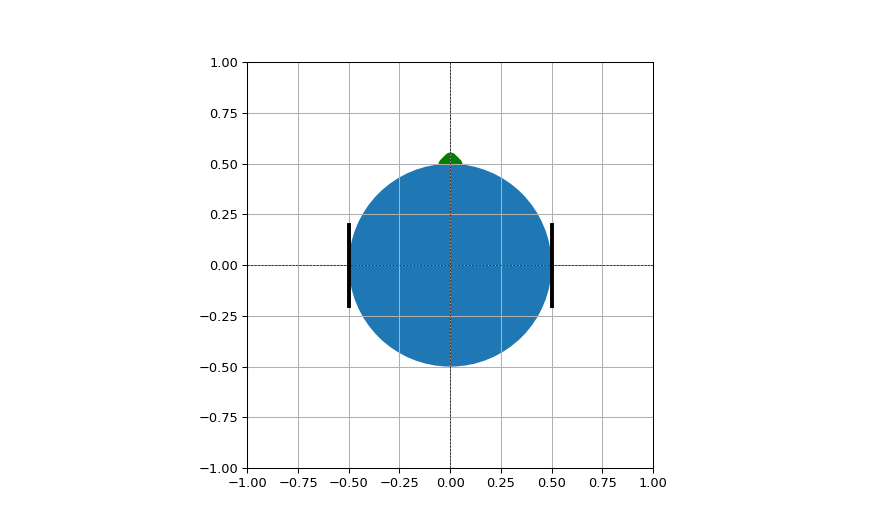

In [304]:
#Plot the car with a statistic way to just visualize its architecture  
figure()
axes = gca()
axes.axis([-1, 1, -1, 1])
axes.set_aspect(1)
grid(True)
...
import matplotlib.pyplot as plt

#plot the line of the left wheel
plt.axvline(-0.5, 0.4, 0.6, color='k', linewidth=3)
plt.show()

#plot the line of the right wheel
plt.axvline(0.5, 0.4, 0.6, color='k', linewidth=3)
plt.show()

#figure, axes = plt.subplots()
draw_circle = plt.Circle((0, 0), 0.5)

axes.set_aspect(1)
axes.add_artist(draw_circle)
#plt.title('Circle')
#plt.plot(1,1, 'bo')
#plt.show()

#plot a ligne h and v
plt.axhline(0 , color='k' , linestyle='dashed' , linewidth=0.5)
plt.axvline(0 , color='k' , linestyle='dashed' , linewidth=0.5)

#plot a green point
x_coordinates_r = 0.0
y_coordinates_r = 0.5
plt.scatter(x_coordinates_r, y_coordinates_r, color='green' , marker ='D' , linewidth = 10 )

### Solution dynamic of graphical representation

<IPython.core.display.Javascript object>


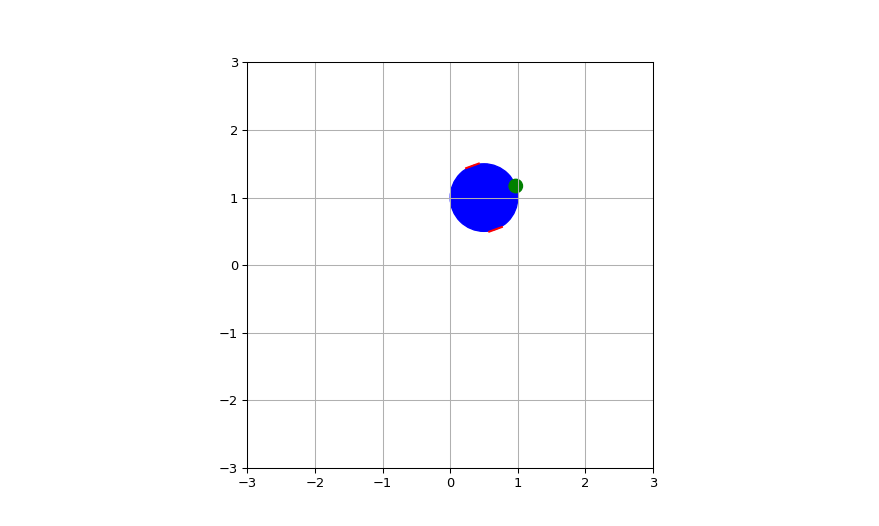

In [305]:
#Plot the car with a dynamic way, parametres
x , y , theta = 0.5 , 1 , pi/9

#plot the circle + the sticker in a dynamic way, depend to theta
circle = Circle((x,y), D/2, color='b')
sticker = Circle((x+(D/2)*cos(theta),y+(D/2)*sin(theta)),R, color ='g')

#locate the extrum points of right wheel
Right1 = [x+(D/2)*sin(theta)+R*cos(theta),
          y-(D/2)*cos(theta)+R*sin(theta)]
Right2 = [x+(D/2)*sin(theta)-R*cos(theta),
          y-(D/2)*cos(theta)-R*sin(theta)]

#locate the extrum points of left wheel
Left1 = [x-(D/2)*sin(theta)+R*cos(theta),
         y+(D/2)*cos(theta)+R*sin(theta)]
Left2 = [x-(D/2)*sin(theta)-R*cos(theta),
         y+(D/2)*cos(theta)-R*sin(theta)]

#assemble x and y to show the plot
x_Right = [Right1[0], Right2[0]]
y_Right = [Right1[1], Right2[1]]
x_Left = [Left1[0], Left2[0]]
y_Left = [Left1[1], Left2[1]]

#visualizaiton snippets
figure()
axes = gca()
axes.axis([-3, 3, -3, 3])
axes.set_aspect(1)
grid(True)

#circle + sticker
axes.add_patch(circle)
axes.add_patch(sticker)

#plot wheels
plot(x_Right, y_Right,color='red')
plot(x_Left, y_Left,color='red')
 

### Task - Kinematic Modeling

We assume that we can control the wheels angular velocities $\omega_l = \dot{\phi}_l$ and $\omega_r = \dot{\phi}_r$ (this is a *kinematic* model of the robot).
We also assume that the chariot wheels roll without slipping. 

Establish the differential equations that relate $\dot{x}$,
$\dot{y}$ and $\dot{\theta}$ with $\omega_l$ and $\omega_r$.

### Solution : Kinematic Modeling

We define a Cartesian coordinate system to study the problem $R_0(0, \vec{e_x}, \vec{e_y})$ Plane movement




$\dot{X} = \begin{bmatrix}
 \dot{x} \\
 \dot{y}\\
 \dot{\theta}
\end{bmatrix}_{/R_0}$ being the derivative of the state matrix




$\|v(t)\| = \frac{\omega_r + \omega_l}{2}Rt$ because the movement of the robot is given by the movements of the two wheels





the robot has an angular movement, so : $\vec{v} = v(\cos{(\theta})\vec{e_x} + \sin{(\theta)}\vec{e_y})$





So : $\begin{cases}
\dot{x} = \frac{\omega_r + \omega_l}{2}R\cos{\theta} \\
\dot{y} = \frac{\omega_r + \omega_l}{2}R\sin{\theta}
\end{cases}$





On the other hand : $\vec{LR} = \vec{LU} + \vec{UR}$ where $\vec{LR} = 2D$




So, we derivate $\vec{LR}$ and we get :




$\frac{d\vec{LU}}{dt} + \frac{d\vec{UR}}{dt} = 2L\dot{\theta}$




Where : $\begin{cases}
\frac{d\vec{\omega}}{dt} = -\vec{v_l} \; \; \; left \; wheel \; rotation \; speed\\
\frac{d\vec{UR}}{dt} = -\vec{v_r} \; \; \; right \;wheel \;rotation \;speed
\end{cases}$




Projecting on the Ox axis : $-v_l\cos{\theta} + v_r\cos{\theta} = 2D\dot{\theta}\cos{\theta}$





That gives : $\dot{\theta} = \frac{\omega_r - \omega_l}{2D}*R$




So : $\begin{cases}
\dot{x} = (R/2)*cos(\theta)*(\omega_l + \omega_r ) \\
\dot{y} = (R/2)*sin(\theta)*(\omega_l + \omega_r ) \\
\dot{\theta} = (R/D)*(\omega_r - \omega_l )
\end{cases}$

### Equations

it ends up like this 
$\dot{x} = (R/2)*cos(\theta)*(\omega_l + \omega_r )$

$\dot{y} = (R/2)*sin(\theta)*(\omega_l + \omega_r )$

$\dot{\theta} = (R/D)*(\omega_r - \omega_l )$

### Task - Model Implementation

Implement a function `f` that computes $\dot{X} = (\dot{x}, \dot{y}, \dot{\theta})$ given $X = (x,y,\theta)$ 
and $\omega = (\omega_l, \omega_r)$.


In [306]:
#Ps : working without define before omega_l and omerga_r was somewhat hard to bear on that case
#so then we elaborate on that path by defining first those two variables
omega_l , omega_r = 0 , 20
#function
def fun(t, X):
    x, y, theta = X
    dx = (R/2)*np.cos(theta)*(omega_l + omega_r)
    dy = (R/2)*np.sin(theta)*(omega_l + omega_r)
    dtheta = (R/D)*(omega_r - omega_l)
    dX = array([dx, dy, dtheta])
    return dX

### Task - Simulation Setup

Show how the `solve_ivp` function can be used to solve the system dynamics on a span of 10 secs when:

  - $\omega$ is constant, equal to $\omega_0 = (\omega_{l0}, \omega_{r0})$ and
  
  - $X_0 = (x_0, y_0, \theta_0)$.
  
  

In [307]:
from scipy.integrate import solve_ivp
#define parametres for the resolution
options = {
    # at least 50 data points
    "max_step": 1 / 70, 
    # standard absolute tolerance
    "atol"    : 1e-6,        
    # very large relative tolerance
    "rtol"    : 1e9 
}

#to no longer rerun the code above we redefine the parametres
omega_l , omega_r = 2 , 10

#parametres for resolution
t0 , tf  = 0 , 10
y0 = [0,0,pi/4]

In [308]:
#using solve_ivp to solve the system dynamics on a span of 10 secs 
result = solve_ivp(fun, t_span=[t0, tf], y0=y0, **options)

<IPython.core.display.Javascript object>


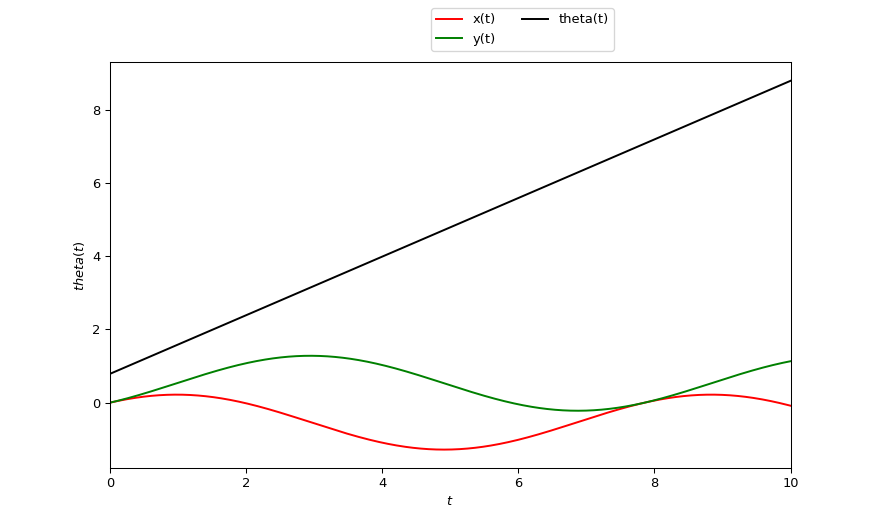

In [309]:
figure()
#plot x
plot(result["t"], result["y"][0], "r")
xlim(t0, tf); xlabel("$t$"); ylabel("$x(t)$")

#plot y
plot(result["t"], result["y"][1], "g")
xlim(t0, tf); xlabel("$t$"); ylabel("$y(t)$")

#plot theta
plot(result["t"], result["y"][2], "k")
xlim(t0, tf); xlabel("$t$"); ylabel("$theta(t)$")

#merge the plots
matplotlib.pyplot.legend(["x(t)", "y(t)","theta(t)"], bbox_to_anchor=(0.75, 1.15), ncol=2)

### Task: Simulation Validation
 
  
We would like to validate the results of our simulation code at this stage. 

To do this, select a few initials conditions $X_0$ and values of $\omega_0$ that are "as different as possible" (we want to check that our simulation of the dynamics works in all cases) for which the analytical solution is know. Compute these solutions, then, plot $x$, $y$ and $\theta$ as functions of the time $t$ and check that the result is consistent.

In [311]:
omega_r ,omega_l  = 5 , 12
y0 = [5,5,pi/4]

In [312]:
#using solve_ivp 
result = solve_ivp(fun, t_span=[t0, tf], y0=y0, **options)

<IPython.core.display.Javascript object>


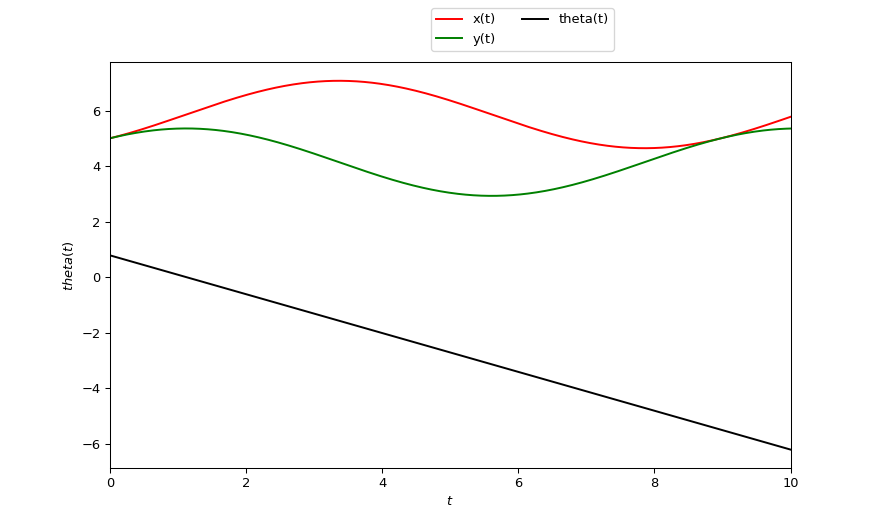

In [313]:
figure()
#plot x 
plot(result["t"], result["y"][0], "r")
xlim(t0, tf); xlabel("$t$"); ylabel("$x(t)$")

#plot y
plot(result["t"], result["y"][1], "g")
xlim(t0, tf); xlabel("$t$"); ylabel("$y(t)$")

#plot theta
plot(result["t"], result["y"][2], "k")
xlim(t0, tf); xlabel("$t$"); ylabel("$theta(t)$")

#merge the plots
matplotlib.pyplot.legend(["x(t)", "y(t)","theta(t)"], bbox_to_anchor=(0.75, 1.15), ncol=2)

<IPython.core.display.Javascript object>


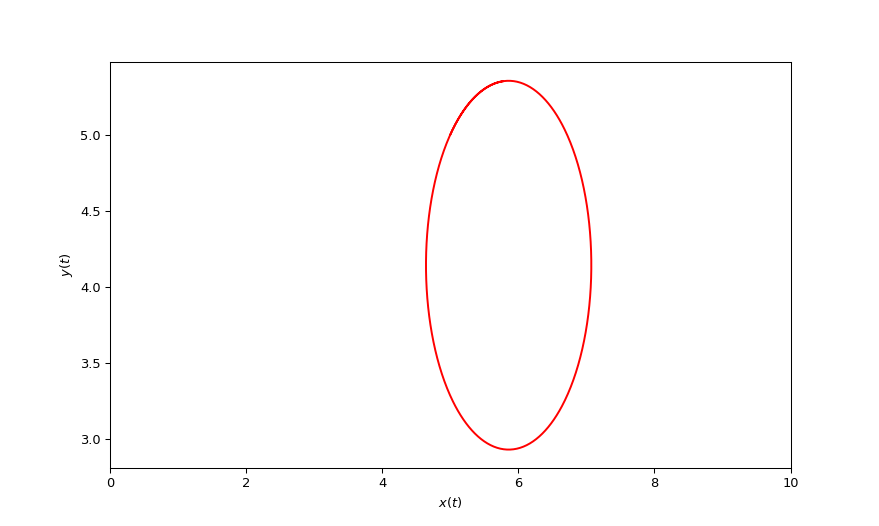

Text(0, 0.5, '$y(t)$')

In [314]:
#visualize the x and y
figure()
plot(result["y"][0], result["y"][1], "r")
xlim(t0, tf); xlabel("$x(t)$"); ylabel("$y(t)$")

In [315]:
omega_r ,omega_l  = 5 , 12
y0 = [0,5,pi/4]

In [316]:
#using solve_ivp 
result = solve_ivp(fun, t_span=[t0, tf], y0=y0, **options)

<IPython.core.display.Javascript object>


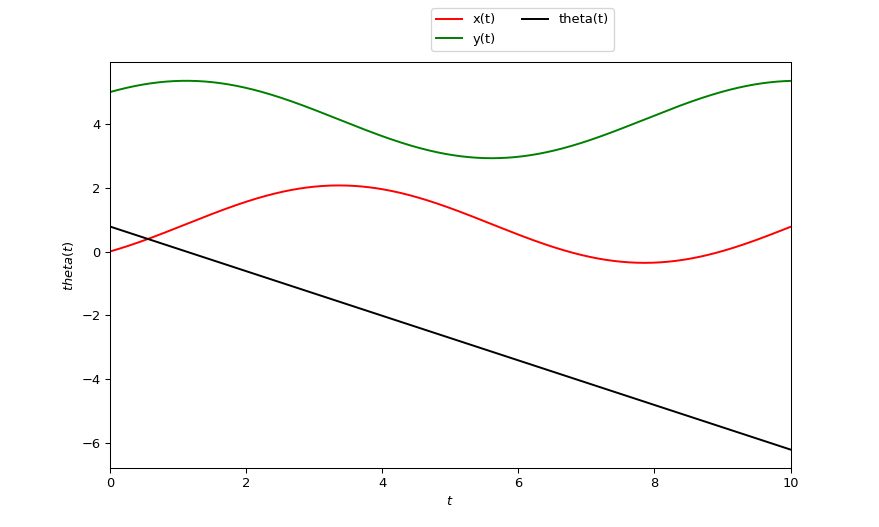

In [317]:
figure()
#plot x 
plot(result["t"], result["y"][0], "r")
xlim(t0, tf); xlabel("$t$"); ylabel("$x(t)$")

#plot y
plot(result["t"], result["y"][1], "g")
xlim(t0, tf); xlabel("$t$"); ylabel("$y(t)$")

#plot theta
plot(result["t"], result["y"][2], "k")
xlim(t0, tf); xlabel("$t$"); ylabel("$theta(t)$")

#merge the plots
matplotlib.pyplot.legend(["x(t)", "y(t)","theta(t)"], bbox_to_anchor=(0.75, 1.15), ncol=2)

<IPython.core.display.Javascript object>


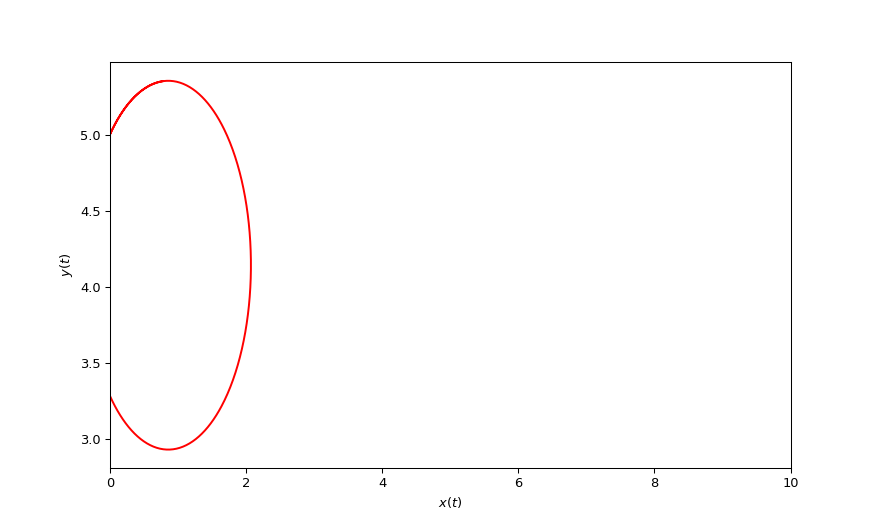

Text(0, 0.5, '$y(t)$')

In [318]:
#visualize the x and y
figure()
plot(result["y"][0], result["y"][1], "r")
xlim(t0, tf); xlabel("$x(t)$"); ylabel("$y(t)$")

In [319]:
omega_r ,omega_l  = 20 , 30
y0 = [0,5,pi/4]

In [320]:
#using solve_ivp 
result = solve_ivp(fun, t_span=[t0, tf], y0=y0, **options)

<IPython.core.display.Javascript object>


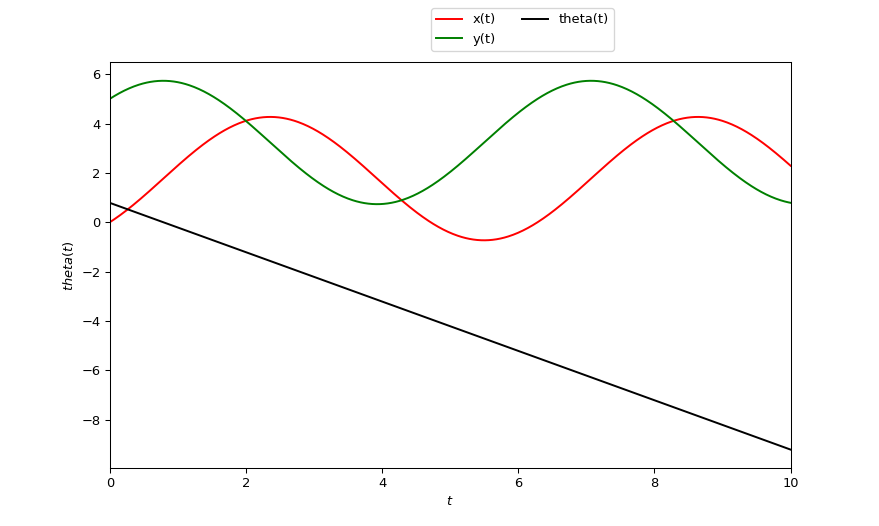

In [321]:
figure()
#plot x 
plot(result["t"], result["y"][0], "r")
xlim(t0, tf); xlabel("$t$"); ylabel("$x(t)$")

#plot y
plot(result["t"], result["y"][1], "g")
xlim(t0, tf); xlabel("$t$"); ylabel("$y(t)$")

#plot theta
plot(result["t"], result["y"][2], "k")
xlim(t0, tf); xlabel("$t$"); ylabel("$theta(t)$")

#merge the plots
matplotlib.pyplot.legend(["x(t)", "y(t)","theta(t)"], bbox_to_anchor=(0.75, 1.15), ncol=2)

<IPython.core.display.Javascript object>


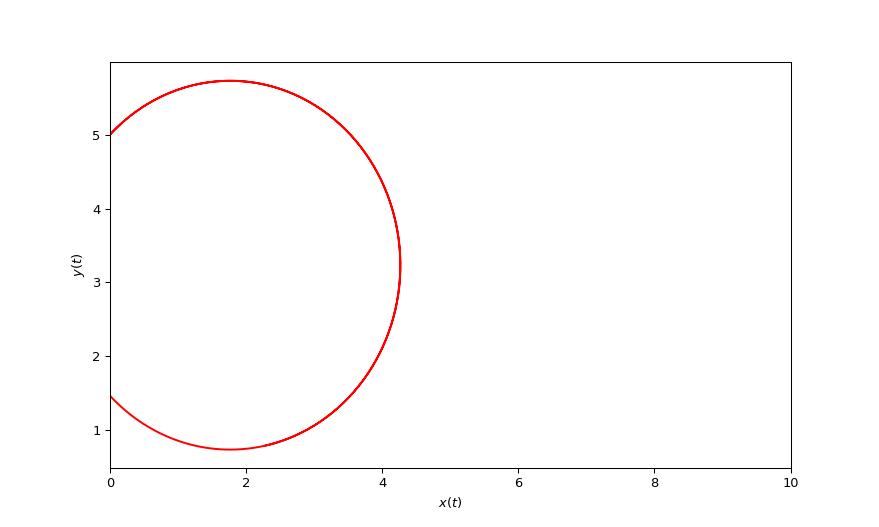

Text(0, 0.5, '$y(t)$')

In [322]:
#visualize the x and y
figure()
plot(result["y"][0], result["y"][1], "r")
xlim(t0, tf); xlabel("$x(t)$"); ylabel("$y(t)$")

### Task: Time-dependent Inputs

Provide a simulation code that handles the case of time-dependent angular velocities $\omega_l$ and $\omega_r$, for example:
    

In [323]:
def omega_l(t):
    if t <= 5.0:
        return pi * D
    else:
        return 0.0
    
def omega_r(t):
    if t >= 5.0:
        return pi * D
    else:
        return 0.0

In [324]:
#the new function with the concept of time-dependent inputs
def f(t, X):
    x, y, theta = X
    dx = (R/2)*cos(theta)*(omega_l(t)+omega_r(t))
    dy = (R/2)*sin(theta)*(omega_l(t)+omega_r(t))
    dtheta =(R/D)*(omega_r(t)-omega_l(t))
    dX = array([dx, dy, dtheta])
    return dX

In [325]:
#parametres
y0 = [-5,5,pi/6]

In [326]:
#using solve_ivp
result = solve_ivp(f, t_span=[t0, tf], y0=y0, **options)

<IPython.core.display.Javascript object>


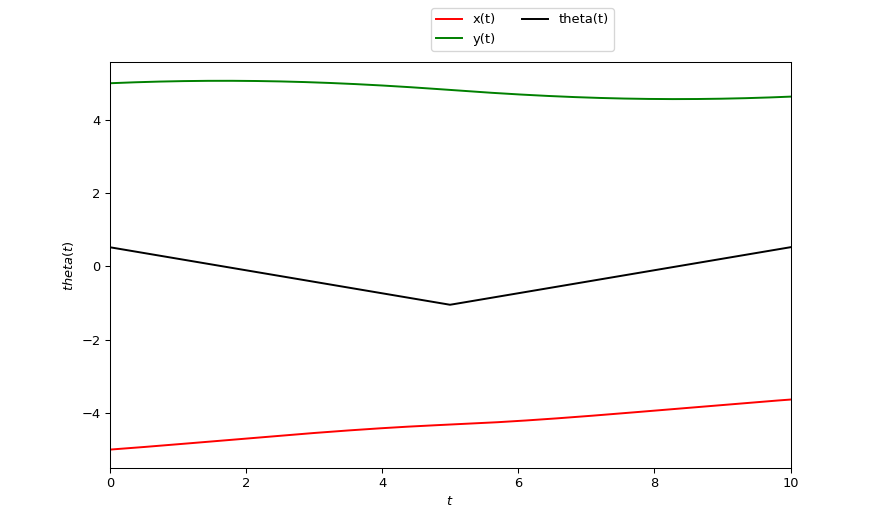

In [327]:
figure()
#plot x 
plot(result["t"], result["y"][0], "r")
xlim(t0, tf); xlabel("$t$"); ylabel("$x(t)$")

#plot y
plot(result["t"], result["y"][1], "g")
xlim(t0, tf); xlabel("$t$"); ylabel("$y(t)$")

#plot theta
plot(result["t"], result["y"][2], "k")
xlim(t0, tf); xlabel("$t$"); ylabel("$theta(t)$")

#merge the plots
matplotlib.pyplot.legend(["x(t)", "y(t)","theta(t)"], bbox_to_anchor=(0.75, 1.15), ncol=2)

### Task: Validation

Compute the analytical solution for $X_0 = (0.0, 0.0, 0.0)$ for the time-dependent $\omega(t)$ example and check that your simulation code outputs consistent results.

In [328]:
#parametres
y0 = [0,0,0]

In [329]:
#using solve_ivp
result = solve_ivp(f, t_span=[t0, tf], y0=y0, **options)

<IPython.core.display.Javascript object>


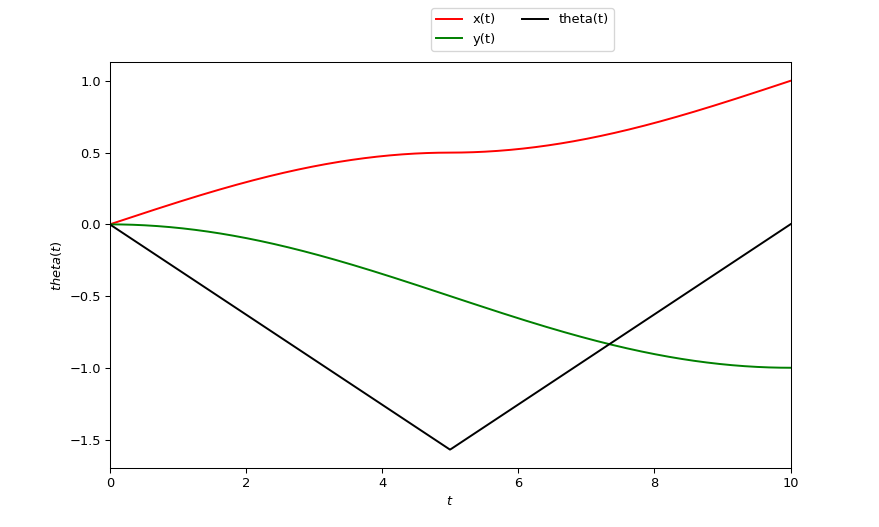

In [330]:
figure()

#plot x
plot(result["t"], result["y"][0], "r")
xlim(t0, tf); xlabel("$t$"); ylabel("$x(t)$")

#plot y
plot(result["t"], result["y"][1], "g")
xlim(t0, tf); xlabel("$t$"); ylabel("$y(t)$")

#plot theta
plot(result["t"], result["y"][2], "k")
xlim(t0, tf); xlabel("$t$"); ylabel("$theta(t)$")

#merge the plots
matplotlib.pyplot.legend(["x(t)", "y(t)","theta(t)"], bbox_to_anchor=(0.75, 1.15), ncol=2)

### Task: User-defined Sample Times

Adapt your simulation code to generate arrays `x`, `y` and `theta` which correspond to a given array of time values `t` in $[0.0, 10.0]$. Test the code with `t = arange(0.0, 10.0, dt)` where `dt = 1.0 / 60.0` ; in this case we get a state update 60 times per second, something that is appropriate to display animations.

In [331]:
y0 = [0,0,0]

options1 = {
    # at least 50 data points
    "max_step": 1 / 60, 
    # standard absolute tolerance
    "atol"    : 1e-6,        
    # very large relative tolerance
    "rtol"    : 1e9 
}

#using solve_ivp
result = solve_ivp(f, t_span=[t0, tf], y0=y0, **options1)
time = result["t"]

# x, y and theta
x , y , theta = result["y"][0] , result["y"][1], result["y"][2]

#test the codee with dt and t defined in the task
dt = 1.0 / 60.0
t = arange(t0, tf,dt)

### Task: Animation

For each of the use cases considered so far, compute the solution as arrays `x`, `y` and `theta` which correspond to `t = arange(0.0, 10.0, dt)` where `dt = 1.0 / 60.0` and display the result of this simulation graphically as an animated robot in the plane. Refer to [this example notebook](https://github.com/boisgera/control-engineering-with-python/blob/master/examples/animation.ipynb) if necessary.

In [332]:
#Un moteur à la fois
def omega_l(t):
    if t <= 5.0:
        return 3*pi * D
    else:
        return 0.0
    
def omega_r(t):
    if 5<=t<=10:
        return 3*pi * D
    else:
        return 0.0

In [333]:
#Tourne sur lui même 
def omega_l(t):
    return -10*pi * D

def omega_r(t):
    return 10*pi*D

In [334]:
#les deux marchent en même
def omega_l(t):
    return 0.8*pi*D
    
def omega_r(t):
    return pi*D

In [335]:
#trajectoire no partculier
def omega_l(t):
    if 0<=t<=1:
        return 10*D+15
    else:
        return -10*pi * D

def omega_r(t):
    if 0<=t<=1:
        return 20*pi*D
    else :
        return -10*pi * D

In [336]:
y0 = [0,0,0]

options1 = {
    # at least 50 data points
    "max_step": 1 / 60, 
    # standard absolute tolerance
    "atol"    : 1e-6,        
    # very large relative tolerance
    "rtol"    : 1e9 
}

result = solve_ivp(f, t_span=[t0, tf], y0=y0, **options1)
time = result["t"]
x = result["y"][0]
y = result["y"][1]
theta = result["y"][2]

<IPython.core.display.Javascript object>


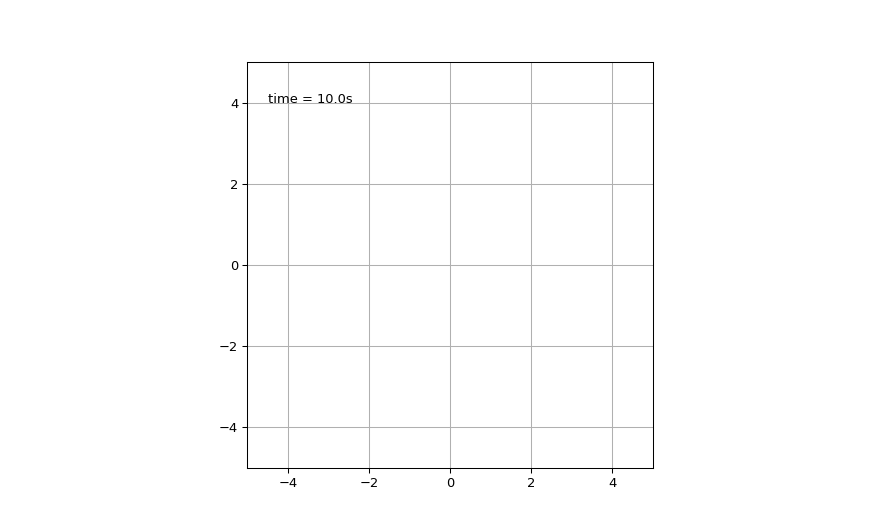

In [337]:
#Script to help in animation
fig = figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-5, 5), ylim=(-5, 5))
ax.set_aspect('equal')
ax.grid()



#lines
line1,= ax.plot([],[],"k",lw=3)
line2,= ax.plot([],[],"k",lw=3)
#circle
circle = matplotlib.patches.Circle([0.0, 0.0], radius=D/2, fc="b")
cir = matplotlib.patches.Circle([0.0, 0.5], radius=0.1, fc="g")
ax.add_artist(circle)
ax.add_artist(cir)
#time excution
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)



#Show the path upon which our robot passes through
#linex, = ax.plot(x,y,"k",lw=2)

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    time_text.set_text('')
    return line1,line2, circle,cir, time_text


def animate(i):
    thisx1 = [x[i]+(D/2)*sin(theta[i])+R*cos(theta[i]), x[i]+(D/2)*sin(theta[i])-R*cos(theta[i])]
    thisy1 = [y[i]-(D/2)*cos(theta[i])+R*sin(theta[i]), y[i]-(D/2)*cos(theta[i])-R*sin(theta[i])]
    
    thisx2 = [x[i]-(D/2)*sin(theta[i])+R*cos(theta[i]), x[i]-(D/2)*sin(theta[i])-R*cos(theta[i])]
    thisy2 = [y[i]+(D/2)*cos(theta[i])+R*sin(theta[i]), y[i]+(D/2)*cos(theta[i])-R*sin(theta[i])]
    
    line1.set_data(thisx1, thisy1)
    line2.set_data(thisx2, thisy2)
    circle.center = [x[i], y[i]]
    cir.center = [x[i]+(D/2)*cos(theta[i]),y[i]+(D/2)*sin(theta[i])]
    time_text.set_text(time_template % (i*dt))
    
    return line1,line2, circle,cir, time_text


anim = matplotlib.animation.FuncAnimation(fig, animate, range(0, len(t)), interval=dt*1000, blit=True, init_func=init, repeat=False)

Local Control in a Lane
===================

At Rest
--------------------------------------

### Task : Equilibrium

Show that for a suitable (constant) choice $\omega_e \in \mathbb{R}^2$ of the vector input $\omega$, the state $X_e = (x_e, y_e, \theta_e) = (0,0,0)$ is an equilibrium of the mobile robot.

Show that for any other $\omega_e$, the system has no equilibrium.

Conversely, if $\omega = \omega_e$, what are the other equilibria of the system?

### Solution : Equilibrium
in order to have each equation with 0 in result, we need to have 

for $\dot{x}$ equation $:$ $w$ = ( - $\lambda$ , $\lambda$ )

for $\dot{y}$ equation $:$ $w$ = ( - $\gamma$ , $\gamma$ )

for $\dot{w}$ equation $:$ $w$ = ( $\beta$ , $\beta$ )


with $\lambda$ , $\gamma$ , $\beta$ are reals 


$\dot{x} = (R/2)*cos(\theta)*(\omega_l + \omega_r )$

$\dot{y} = (R/2)*sin(\theta)*(\omega_l + \omega_r )$

$\dot{\theta} = (R/D)*(\omega_r - \omega_l )$

### Task : Linearized System


Let $\omega = \omega_e$ and $X_e = (0,0,0)$.

Introduce the error variables $\Delta X = (\Delta x, \Delta y, \Delta \theta) = X - X_e$.
Compute the corresponding linearized dynamics and put it in standard form: compute the matrices $A$ and $B$.

### Solution : Linearized System
according to jacobieen calculs we end up with these results

$A = \begin{bmatrix}
0 & 0 & 0\\
0 & 0 & (R/2)(\omega_l + \omega_r)\\
0 & 0 & 0
\end{bmatrix}$

$B = \begin{bmatrix}
R/2 & R/2 \\
0 & 0 \\
R/2 & -R/2 
\end{bmatrix}$

### Task : Stability Analysis


Is the linearized system asymptotically stable around $(0,0,0)$ when $\Delta \omega = (0,0)$ ?

Is the original system asymptotically stable ? Or even (locally) attractive ? Justify your answers.

### Solution : Stability Analysis

Fisrt , we have $\frac{d\Delta{x}}{dt} = A \Delta{x}$ where $A = f(x_e, \omega_e)$

So (0, 0, 0) is locally asymptotically stable

We also have $\begin{cases} \frac{d\Delta{x}}{dt} = f(\Delta{x}, \Delta{\omega}) \\ \omega_e = (0, 0) \end{cases}$

So $\begin{cases} \Delta{\dot{x}}=0 \\ \Delta{\dot{y}}=0 \\ \Delta{\dot{\theta}}=0 \end{cases}$

Second, since the point is not stable so is not attractive, and the whole system is not asymptotically stable because according to the last response we have all the eigenvalues are equals to $0$ and the condition of the stability is up to the sign of these eigenvalues of the matrice of A that are negative. So the system in that regard is stable.

### Task : Linearized System
Show that the linearized system is not controllable. 

### Solution : Linearized System


$\dot{X} = \begin{bmatrix}
\dot{x}\\
\dot{y}\\
\dot{\theta}
\end{bmatrix} = A * \begin{bmatrix}
x\\
y\\
\theta
\end{bmatrix} + B * \omega^T$

$\dot{X}_r = \begin{bmatrix}
\dot{x}_r\\
\dot{y}_r\\
\dot{\theta}_r
\end{bmatrix} = A * \begin{bmatrix}
x_r\\
y_r\\
\theta_r
\end{bmatrix} + B * \omega_r^T$

$\frac{\Delta{X}}{dt} = A * \Delta{X} + B * \Delta{\omega^T}$

Normally we have

$A = \begin{bmatrix}
0 & 0 & 0\\
0 & 0 & (R/2)(\omega_l + \omega_r)\\
0 & 0 & 0
\end{bmatrix}$

$and$

$B = \begin{bmatrix}
R/2 & R/2 \\
0 & 0 \\
R/2 & -R/2 
\end{bmatrix}$

our system will be controllable if : $rang($ $B$ , $AB$ , $A²B$ $)$ $=$ $3$

$A²B$ $=$ $0$ 

$and$

$AB = \begin{bmatrix}
0 & 0 \\
(R/2)(\omega_l + \omega_r) & -(R/2)(\omega_l + \omega_r) \\
0 & 0 
\end{bmatrix}$


or we notice that the number of columns linearly independant is $1$ so $rang($ $B$ , $AB$ , $A²B$ $)$ $=$ $0$ so the system is not controllable

In [338]:
pip install control

Note: you may need to restart the kernel to use updated packages.


In [339]:
#calcul the matrix
import control as ct

import numpy as np
omega_l , omega_r = np.random.random(size=2)


A = [[0, 0, 0], 
    [0, 0, (R/2)*(omega_l + omega_r)],
    [0, 0, 0]]

B = [[R/2,  R/2], 
    [0,  0],
    [-R/D,  -R/D]]

 
C = ct.ctrb(A,B)

print(C)

[[ 0.05      0.05      0.        0.        0.        0.      ]
 [ 0.        0.       -0.005738 -0.005738  0.        0.      ]
 [-0.1      -0.1       0.        0.        0.        0.      ]]


$Rank($ $C$ $)$ $=$ $2$ then , the linearized sytem is not controllable.

### Task : Straight Line

Let $x_r(t) = v t$ and $y_r(t) = 0$ where $v \in \mathbb{R}$ and $v \neq 0$. Determine the set of trajectories $X_r(t) = (x_r(t), y_r(t), \theta_r(t))$ which are admissible and compute the corresponding reference control $\omega_r(t)$.

We have

$\dot{x} = (R/2)*cos(\theta)*(\omega_l + \omega_r )$

$\dot{y} = (R/2)*sin(\theta)*(\omega_l + \omega_r )$

$\dot{\theta} = (R/D)*(\omega_r - \omega_l )$

Since $x_r(t) = v t$ and $y_r(t) = 0$ , then $\dot{x} = v$ and $\dot{y} = 0$

So :

$(R/2)*cos(\theta)*(\omega_l + \omega_r ) = v$

$(R/2)*sin(\theta)*(\omega_l + \omega_r ) = 0$

Hence $sin(\theta) = 0$ because $(\omega_l + \omega_r ) \neq 0$

==> $sin(\theta) = \pi$ such as $k \in \mathbb{Z}$

==> $\dot{\theta} = 0$

==> So $(\omega_l = \omega_r )$

Therefore the set of trajectories $X_r(t) = (v t, 0, k \pi)$ such as $k \in \mathbb{Z}$

$\dot{x} = (R/2)*(\pm 1)*2  \omega_r  = \pm R \omega_r = v$

And the corresponding reference control $\omega_r(t) = \pm v / R$

### Task : Linearized System

Let $\Delta X(t) = X(t) - X_r(t)$ and $\Delta \omega(t) = \omega(t) - \omega_r(t)$. Compute the linearized dynamics of the system. Is the system asymptotically stable ? Attractive ?

#### linearized system
$\dot{X} = \begin{bmatrix}
\dot{x}\\
\dot{y}\\
\dot{\theta}
\end{bmatrix} = A * \begin{bmatrix}
x\\
y\\
\theta
\end{bmatrix} + B * \omega^T$

$\dot{X}_r = \begin{bmatrix}
\dot{x}_r\\
\dot{y}_r\\
\dot{\theta}_r
\end{bmatrix} = A * \begin{bmatrix}
x_r\\
y_r\\
\theta_r
\end{bmatrix} + B * \omega_r^T$

$\frac{\Delta{X}}{dt} = A * \Delta{X} + B * \Delta{\omega^T}$

#### stable
... to add after
#### attractvity
... to add after

### Task : Linearized System
Show that the linearized system is controllable.

In [340]:
#calcul the matrix
import control as ct

import numpy as np
omega_l , omega_r = np.random.random(size=2) 
var = 1


A = [[0, 0, 0], 
    [0, 0, var],
    [0, 0, 0]]

B = [[-R/2,  -R/2], 
    [0,  0],
    [R/D,  -R/D]]
 
C = ct.ctrb(A,B)

print(C)

[[-0.05 -0.05  0.    0.    0.    0.  ]
 [ 0.    0.    0.1  -0.1   0.    0.  ]
 [ 0.1  -0.1   0.    0.    0.    0.  ]]


Since the rank equals to 3 so it is controllable, $Rank($ $C$ $)$ $=$ $3$

### Task : Controller Design

Implement a process that computes a gain matrix $K$ that places the poles of the linearized system at some arbitrary location. Select a location of the poles that asymptotically stabilizes the system.



In [341]:
#redefine A et B
R = 0.1
v = 10
A = array([
    [0, 0, 0], 
    [0, 0, v],
    [0, 0, 0]
])

B = array([[R/2,  R/2], 
    [0,  0],
    [R/D,  -R/D]])

from scipy.signal import place_poles
import cmath
#using complex to get the target aimed
poles = [complex(-2,1) , complex(-2,-1) ,-0.2]
#poles = [-1, -2 ,-5]
K = place_poles(A, B ,poles).gain_matrix
print(K)

[[ 13.82132155  -7.25636387  15.85838416]
 [ 15.74456736  -8.9896114  -11.35867139]]


The script is similar to the one we used in the course so then we calcul the K upon which eigenvalues of (A - BK) are all negatives to make the system stable.

### Task: Controller Tuning I

We assume that the reference velocity $v$ is $10$ km/h and that the robot starts at $X(0) = (0.0, 2.0, 0.0)$.
Tune the poles so that the actual location $(x, y)$ is within 10 cm of the desired location within 10 sec and the linear velocity of each wheel never exceeds $15$ km/h.

Plot the evolution of the robot angle. Why is it important to check that this angle stays small ?

### Solution : Controller tuning 1
using the same code we use in the course we end up tweaking in Q and RR values, (Ps: RR to not confuse it with R define before)

In [342]:
from scipy.linalg import solve_continuous_are

#Q symetric define positive and n*n shape and R m*m , m=2
Q = array([[100, 50, 50], [50, 100 , 50] ,[50 , 50 , 100]])
RR = array([[5,2],[2,5]])

#solve
Pi = solve_continuous_are(A, B, Q, RR)
K = inv(RR) @ B.T @ Pi
eigenvalues, _ = eig(A - B @ K)
assert all([real(s) < 0 for s in eigenvalues])

<IPython.core.display.Javascript object>


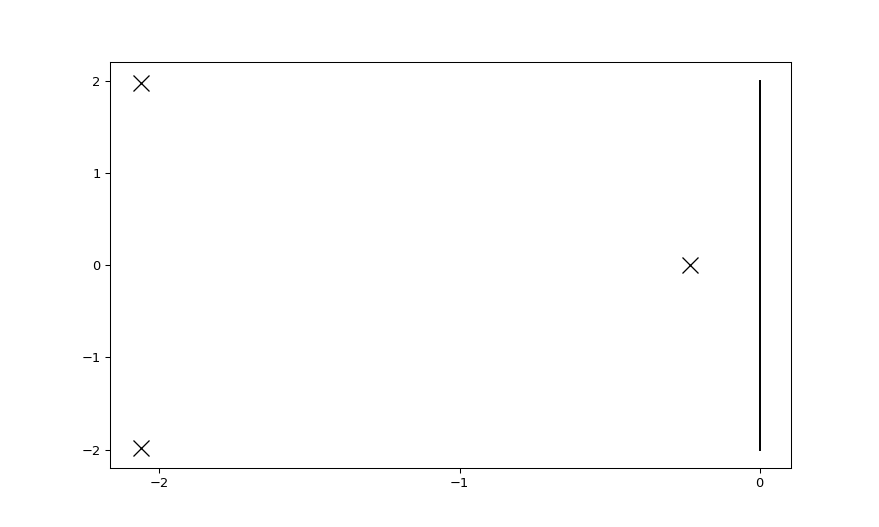

In [343]:
figure()
x = [real(s) for s in eigenvalues]
y = [imag(s) for s in eigenvalues]

plot(x, y, "kx", ms=12.0)

xticks([-2, -1, 0, 1 , 2])
yticks([-2, -1, 0, 1 , 2])

plot([0, 0], [-2,2], "k")
plot([-2, -2], [-0,0], "k")

### Task: Controller Tuning II

Repeat the controller design and tuning steps above using an optimal control methodology.

In [344]:
y0 = [0.0, 2.0 , 0.0]
options1 = {
    # at least 50 data points
    "max_step": 1 / 60, 
    # standard absolute tolerance
    "atol"    : 1e-6,        
    # very large relative tolerance
    "rtol"    : 1e9 
}

def f(t, x):
    return (A - B.dot(K)).dot(x)
result = solve_ivp(f, t_span=[0, 10], y0=y0, **options1)

t = result["t"]
x = result["y"][0]
y = result["y"][1]
theta = result["y"][2]

<IPython.core.display.Javascript object>


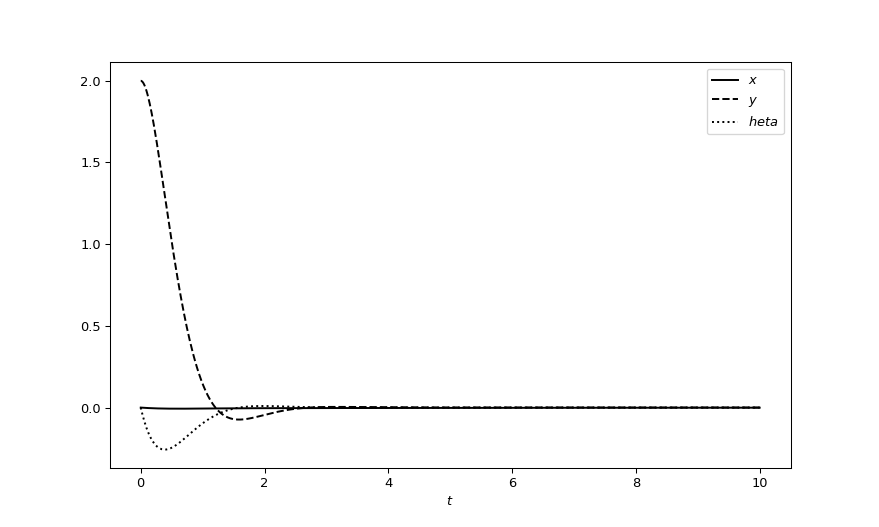

In [345]:
figure()
plot(t, x,"k-", label="$x$")
plot(t, y,"k--", label="$y$")
plot(t, theta,"k:", label="$\theta$")
xlabel("$t$")
legend()

### Task: Controller Validation

Test your controller on the "true" (nonlinear) dynamics. Adjust the controller tuning is necessary.

Demonstrate the controller behavior with an animation of the robot.

### Solution : To animate we use the same script as before

<IPython.core.display.Javascript object>


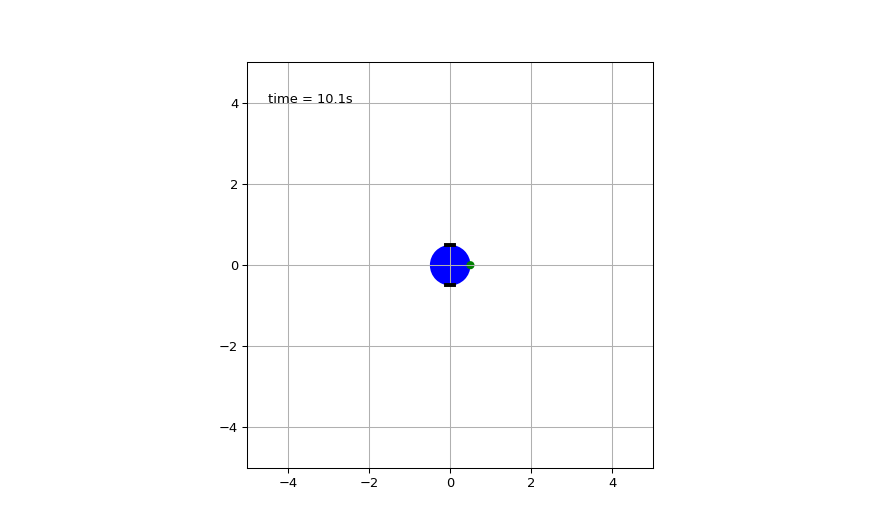

In [346]:
fig = figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-5, 5), ylim=(-5, 5))
ax.set_aspect('equal')
ax.grid()

#lines
line1,= ax.plot([],[],"k",lw=3)
line2,= ax.plot([],[],"k",lw=3)
#circle
circle = matplotlib.patches.Circle([0.0, 0.0], radius=D/2, fc="b")
cir = matplotlib.patches.Circle([0.0, 0.5], radius=0.1, fc="g")
ax.add_artist(circle)
ax.add_artist(cir)
#time excution
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

#Show the path upon which our robot passes through
#linex, = ax.plot(x,y,"k",lw=2)

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    time_text.set_text('')
    return line1,line2, circle,cir, time_text


def animate(i):
    thisx1 = [x[i]+(D/2)*sin(theta[i])+R*cos(theta[i]), x[i]+(D/2)*sin(theta[i])-R*cos(theta[i])]
    thisy1 = [y[i]-(D/2)*cos(theta[i])+R*sin(theta[i]), y[i]-(D/2)*cos(theta[i])-R*sin(theta[i])]
    
    thisx2 = [x[i]-(D/2)*sin(theta[i])+R*cos(theta[i]), x[i]-(D/2)*sin(theta[i])-R*cos(theta[i])]
    thisy2 = [y[i]+(D/2)*cos(theta[i])+R*sin(theta[i]), y[i]+(D/2)*cos(theta[i])-R*sin(theta[i])]
    
    line1.set_data(thisx1, thisy1)
    line2.set_data(thisx2, thisy2)
    circle.center = [x[i], y[i]]
    cir.center = [x[i]+(D/2)*cos(theta[i]),y[i]+(D/2)*sin(theta[i])]
    time_text.set_text(time_template % (i*dt))
    
    return line1,line2, circle,cir, time_text


anim = matplotlib.animation.FuncAnimation(fig, animate, range(0, len(t)), interval=dt*1000, blit=True, init_func=init, repeat=False)

Global Control and General Trajectories
====================================

### Task - Nose Dynamics

Write the differential equation satisfied by the location $(x_n, y_n)$ of the robot nose. 

### Task - Admissible Trajectoiries

Show any (smooth) reference evolution of the robot nose $(x_n^r(t), y_n^r(t))$ and any initial state of the robot consistent with the initial nose location, there is an admissible trajectory $(x(t), y(t), \theta(t))$ that corresponds to this reference. Hint: search the unique $\omega_l(t)$ and $\omega_r(t)$ -- as functions of $\dot{x}_n^r(t)$, $\dot{y}_n^r(t)$ and $\theta(t)$ -- that satisfies this property. 

### Task - Stability

Let $v>0$ be the value in m/s that corresponds to $10$ km/h and let $(x_n^r(t), y_n^r(t)) = (vt, 0)$.
Simulate the robot evolution (with animation) with the choice for $\omega_l$ and $\omega_r$ of the previous question for different values of $X(0)$. In particular, investigate the case of à $\theta(0)$ close to $0$, then close to $\pi$. Is the system dynamics asymptotically stable in each case ?

### Task - Trajectory Planning

Consider three pillars (of radius 10 cm) whose centers are aligned and distant of 3 meters, say at the locations
$$
(1.5,0), (4.5, 0) \mbox{ and } (7.5,0).
$$
Compute a reference trajectory trajectory that would lead the robot nose from $(0,0)$ (with a robot pointing to the right) to $(9,0)$ with a slalom between the pillars. Of course, you don't want the robot frame to bump into the pillars ! Display this trajectory graphically. What happens when if the inputs $\omega_l(t)$ and $\omega_r(t)$ are applied but the robot is not initially at the expected position ?


### Task - Exact (Partial) Linearization

Show that there is a function 
$$
(\omega_l, \omega_r) = \phi(X, u)
$$ 
-- where $u = (u_1, u_2)$ is an *auxiliary control* -- such that the robot nose coordinates satisfy
$$
\dot{x}_n = u_1 \mbox{ and } \dot{y}_n = u_2.
$$


### Task - Stabilization

Let $\Delta x_n = x_n - x_n^r$ and $\Delta y_n = y_n - y_n^r$. Can you find a control law $u$ such that $\Delta x_n$ and $\Delta y_n$ converge exponentially to $0$ with a prescribed time constant $T$ ? Consider again the slalom between the pillars when the initial configuration of the robot does not match the reference trajectory but with this new strategy and contrast with the previous attempt.